In [379]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

df = pd.read_csv('titanic_train.csv')

In [380]:
df.shape

(891, 12)

In [381]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [382]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [383]:
df.dtypes[df.dtypes == 'object']

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

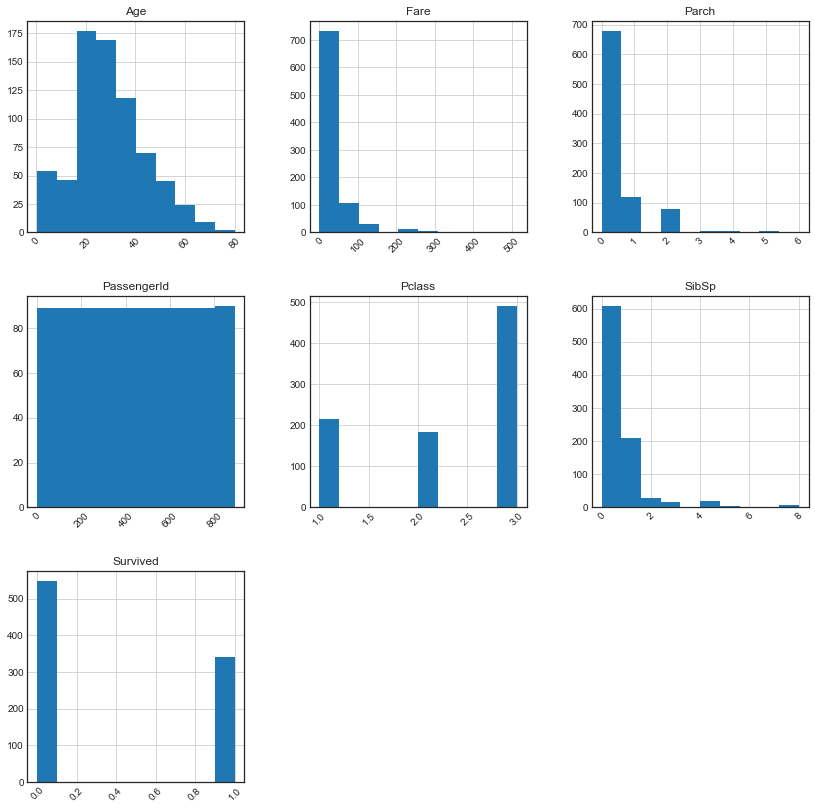

In [384]:
df.hist(figsize=(14,14), xrot=45)
plt.show()

In [385]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [386]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ilett, Miss. Bertha",male,347082,G6,S
freq,1,577,7,4,644


In [387]:
df['Ticket_missing'] = df.Ticket.isnull().astype(int)

In [388]:
df['Cabin_missing'] = df.Cabin.notnull().astype(int)

In [389]:
cm = df[['Cabin_missing', 'Survived']].groupby(['Cabin_missing'])
print(cm.count(), cm.sum())

               Survived
Cabin_missing          
0                   687
1                   204                Survived
Cabin_missing          
0                   206
1                   136


In [390]:
correlations = df.corr()
correlations

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_missing,Cabin_missing
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,NaN,0.019919
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,NaN,0.316912
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,NaN,-0.725541
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,NaN,0.249732
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,NaN,-0.040460
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,NaN,0.036987
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,NaN,0.482075
Ticket_missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cabin_missing,0.019919,0.316912,-0.725541,0.249732,-0.040460,0.036987,0.482075,NaN,1.000000


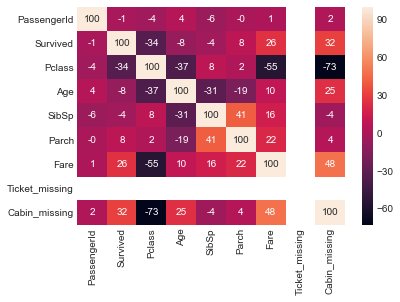

In [391]:
sns.heatmap(correlations*100, annot=True, fmt='.0f')

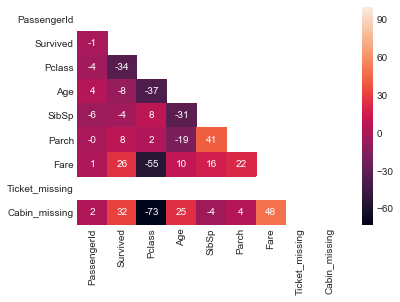

In [392]:
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 
sns.heatmap(correlations*100, annot=True, fmt='.0f', mask=mask)

## 数据清理

In [393]:
df.drop_duplicates()
df.shape

(891, 14)

In [394]:
df = df.drop('PassengerId', axis=1)
df.shape

(891, 13)

In [395]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_missing,Cabin_missing
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


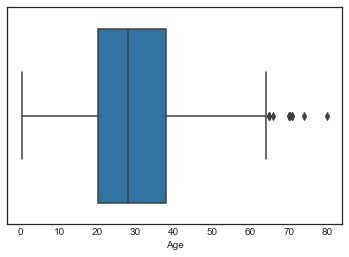

In [396]:
sns.boxplot(df.Age)

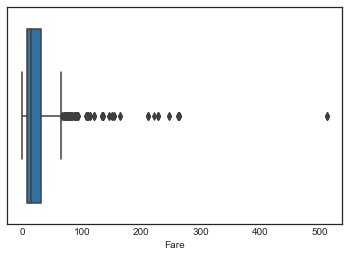

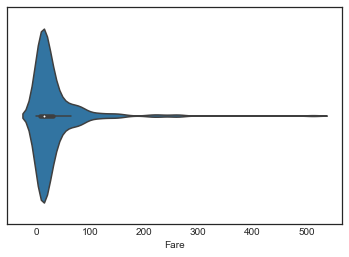

In [397]:
sns.boxplot(df.Fare)
plt.show()
sns.violinplot(df.Fare)

In [398]:
df.Fare.sort_values(ascending=False).head()

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
Name: Fare, dtype: float64

In [399]:
df.Age.sort_values(ascending=False).head()

630    80.0
851    74.0
96     71.0
493    71.0
116    70.5
Name: Age, dtype: float64

In [400]:
bins = [0, 12, 18, 40, 60, 80]
df['Age_group'] = pd.cut(df['Age'], bins)
df.groupby('Age_group')['Survived'].mean()

Age_group
(0, 12]     0.579710
(12, 18]    0.428571
(18, 40]    0.388235
(40, 60]    0.390625
(60, 80]    0.227273
Name: Survived, dtype: float64

In [401]:
df['Title'] = df.Name.str.extract('(M[A-Za-z]+)\.')

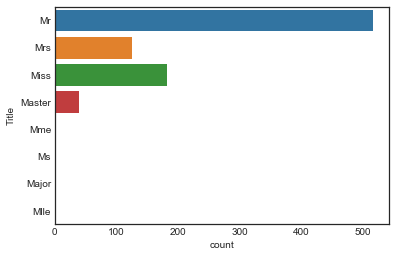

In [402]:
sns.countplot(y='Title', data=df)

In [403]:
df.groupby('Title').Title.count()

Title
Major       2
Master     40
Miss      182
Mlle        2
Mme         1
Mr        517
Mrs       125
Ms          1
Name: Title, dtype: int64

In [404]:
df = df[df.Title.notnull()]
df = df[df.Title != 'Ms']
df = df[df.Title != 'Mme']
df = df[df.Title != 'Mlle']
df = df[df.Title != 'Major']
df.shape

(864, 15)

In [405]:
df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [406]:
df.select_dtypes(include='object').isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       673
Embarked      2
Title         0
dtype: int64

In [407]:
df = df[df.Embarked.notnull()]

In [408]:
df[df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_missing,Cabin_missing,Age_group,Title


In [409]:
df = df.drop(['Name','Ticket', 'Age'], axis=1)

In [410]:
df.replace('male', 1, inplace=True)
df.replace('female', 0, inplace=True)

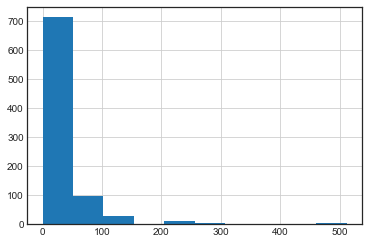

In [411]:
df.Fare.hist()

In [412]:
df['Fare_group'] = pd.cut(df.Fare, [0, 50, 100, 520])

In [413]:
df.drop('Fare', axis=1, inplace=True)

In [414]:
df.drop('Cabin', axis=1, inplace=True)

In [415]:
df = pd.get_dummies(df, columns=['Embarked', 'Title'])

In [416]:
df = pd.get_dummies(df, columns=['Age_group', 'Fare_group'])

In [417]:
df.to_csv('titanic_train_processed.csv')

## 模型训练

In [418]:
from sklearn.model_selection import train_test_split 

y = df.Survived
X = df.drop('Survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print(len(X_train), len(X_test), len(y_train), len(y_test))

689 173 689 173


In [419]:
X_train.describe()

,Pclass,Sex,SibSp,Parch,Ticket_missing,Cabin_missing,Embarked_C,Embarked_Q,Embarked_S,Title_Master,...,Title_Mr,Title_Mrs,"Age_group_(0, 12]","Age_group_(12, 18]","Age_group_(18, 40]","Age_group_(40, 60]","Age_group_(60, 80]","Fare_group_(0, 50]","Fare_group_(50, 100]","Fare_group_(100, 520]"
count,689.000000,689.000000,689.000000,689.000000,689.0,689.000000,689.000000,689.000000,689.000000,689.000000,...,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,2.323657,0.650218,0.538462,0.406386,0.0,0.219158,0.177068,0.089985,0.732946,0.044993,...,0.605225,0.146589,0.079826,0.084180,0.478955,0.127721,0.024673,0.799710,0.114659,0.066763
std,0.825488,0.477248,1.105766,0.831967,0.0,0.413977,0.382004,0.286369,0.442742,0.207439,...,0.489157,0.353953,0.271220,0.277859,0.499920,0.334022,0.155241,0.400508,0.318841,0.249793
min,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,1.000000,8.000000,6.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [420]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
# from sklearn.linear_model import 
from sklearn.ensemble import RandomForestRegressor 

pipelines = {
    'rf': make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123))
}

In [421]:
for key, value in pipelines.items():
    print(key)

rf


In [422]:
rf_hyperparameters = {
    'randomforestregressor__n_estimators': [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]
}

In [423]:
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(pipelines['rf'], rf_hyperparameters)

In [424]:
model.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decr...timators=10, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'randomforestregressor__n_estimators': [100, 200], 'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [442]:
pred = model.predict(X_test).round()
(pred == y_test).mean()

0.7976878612716763

In [443]:
model.best_score_

0.38147709136027086

In [444]:
from sklearn.metrics import r2_score, mean_absolute_error

print('R^2:', r2_score(y_test, pred))
print('MAE:', mean_absolute_error(y_test, pred))

R^2: 0.16019417475728126
MAE: 0.2023121387283237
